# Classification

This notebook performs classification of images (square or circle).

In [1]:
import os
import torch
import torch.nn as nn
from torch import optim

from cnn_framework.dummy_cnn.data_set import DummyCnnDataSet
from cnn_framework.dummy_cnn.model_params import DummyModelParams
from cnn_framework.dummy_cnn.model import DummyCnn
from cnn_framework.utils.data_loader_generators.classifier_data_loader_generator import (
    ClassifierDataLoaderGenerator,
)
from cnn_framework.utils.model_managers.CnnModelManager import CnnModelManager
from cnn_framework.utils.DataManagers import DefaultDataManager
from cnn_framework.utils.metrics import ClassificationAccuracy
from cnn_framework.utils.create_dummy_data_set import generate_data_set

In [2]:
params = DummyModelParams()
params.update()

# Create data set if needed
if not os.path.exists(params.data_dir):
    generate_data_set(params.data_dir)
    print(f"\nData set created in {params.data_dir}")

print(f"\nModel will be saved in {params.models_folder}")
print(f"Predictions will be saved in {params.output_dir}")
print(f"Tensorboard logs will be saved in {params.tensorboard_folder_path}")

Model time id: 20230905-100058-local
epochs 10 | batch 2 | lr 0.0001 | weight decay 0.0 | dropout 0.0

Model will be saved in C:\Users\thoma\models/local/dummy_cnn/20230905-100058-local
Predictions will be saved in C:\Users\thoma\predictions/local/dummy_cnn/20230905-100058-local
Tensorboard logs will be saved in C:\Users\thoma\tensorboard/local/20230905-100058-local_dummy_cnn


In [4]:
loader_generator = ClassifierDataLoaderGenerator(params, DummyCnnDataSet, DefaultDataManager)
train_dl, val_dl, test_dl = loader_generator.generate_data_loader()

### Data source ###
train data is loaded from C:\Users\thoma\data\dummy - 80% elements
val data is loaded from C:\Users\thoma\data\dummy - 20% elements
test data is loaded from C:\Users\thoma\data\dummy - 20% elements
###################


ValueError: Not enough files for train...

In [ ]:
model = DummyCnn(
    nb_classes=params.nb_classes,
    nb_input_channels=params.nb_modalities * params.nb_stacks_per_modality,
)

manager = CnnModelManager(model, params, ClassificationAccuracy)

optimizer = optim.Adam(
    model.parameters(), lr=float(params.learning_rate), betas=(params.beta1, params.beta2),
)  # define the optimization

loss_function = nn.CrossEntropyLoss()  # define the loss function

Current commit hash: e5c70f18844d69b575588ec6b3940e9b471f98ce


In [ ]:
manager.fit(train_dl, val_dl, optimizer, loss_function)

Training in progress: 100.0% | Local step 79 | Epoch 9
Best model saved at epoch 9.

Training successfully finished in 0:00:28.921568.



Predicting with early stopping model.
Model evaluation in progress: 100.0% | Batch #9
Average ClassificationAccuracy: 1.0

Predicting with final model.
Model evaluation in progress: 100.0% | Batch #9
Average ClassificationAccuracy: 1.0


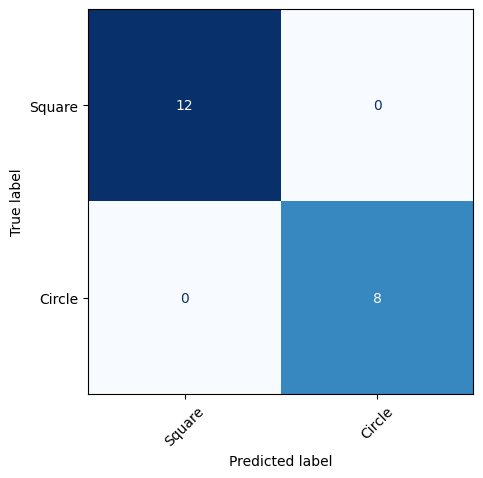

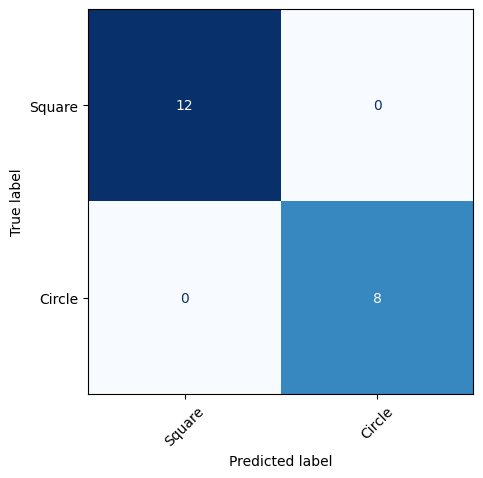

In [ ]:
for model_path, name in zip(
    [manager.model_save_path_early_stopping, manager.model_save_path],
    ["early stopping", "final"],
):
    print(f"\nPredicting with {name} model.")
    # Update model with saved one
    manager.model.load_state_dict(torch.load(model_path))
    manager.predict(test_dl)